In [2]:
import pandas as pd

boston = pd.read_csv("../data/Boston.csv").rename({"Unnamed: 0": "Id"}, axis=1).set_index("Id")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
Id,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9


In [3]:
columns = boston.columns
columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

This dataset is 506 rows × 13 columns. Each row represents one neighborhood.


| **Column** | **Description**                                                     |
| ---------- | ------------------------------------------------------------------- |
| **crim**     | Per capita crime rate by town                                       |
| **zn**       | Proportion of residential land zoned for lots over 25,000 sq. ft.   |
| **indus**    | Proportion of non-retail business acres per town                    |
| **chas**     | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| **nox**      | Nitric oxide concentration (parts per 10 million)                   |
| **rm**       | Average number of rooms per dwelling                                |
| **age**      | Proportion of owner-occupied units built prior to 1940              |
| **dis**      | Weighted distances to five Boston employment centers                |
| **rad**      | Index of accessibility to radial highways                           |
| **tax**      | Property tax rate per \$10,000                                      |
| **ptratio**  | Pupil–teacher ratio by town                                         |
| **lstat**    | Percentage of lower status population                               |
| **medv**     | Median value of owner-occupied homes in \$1000s (target variable)   |


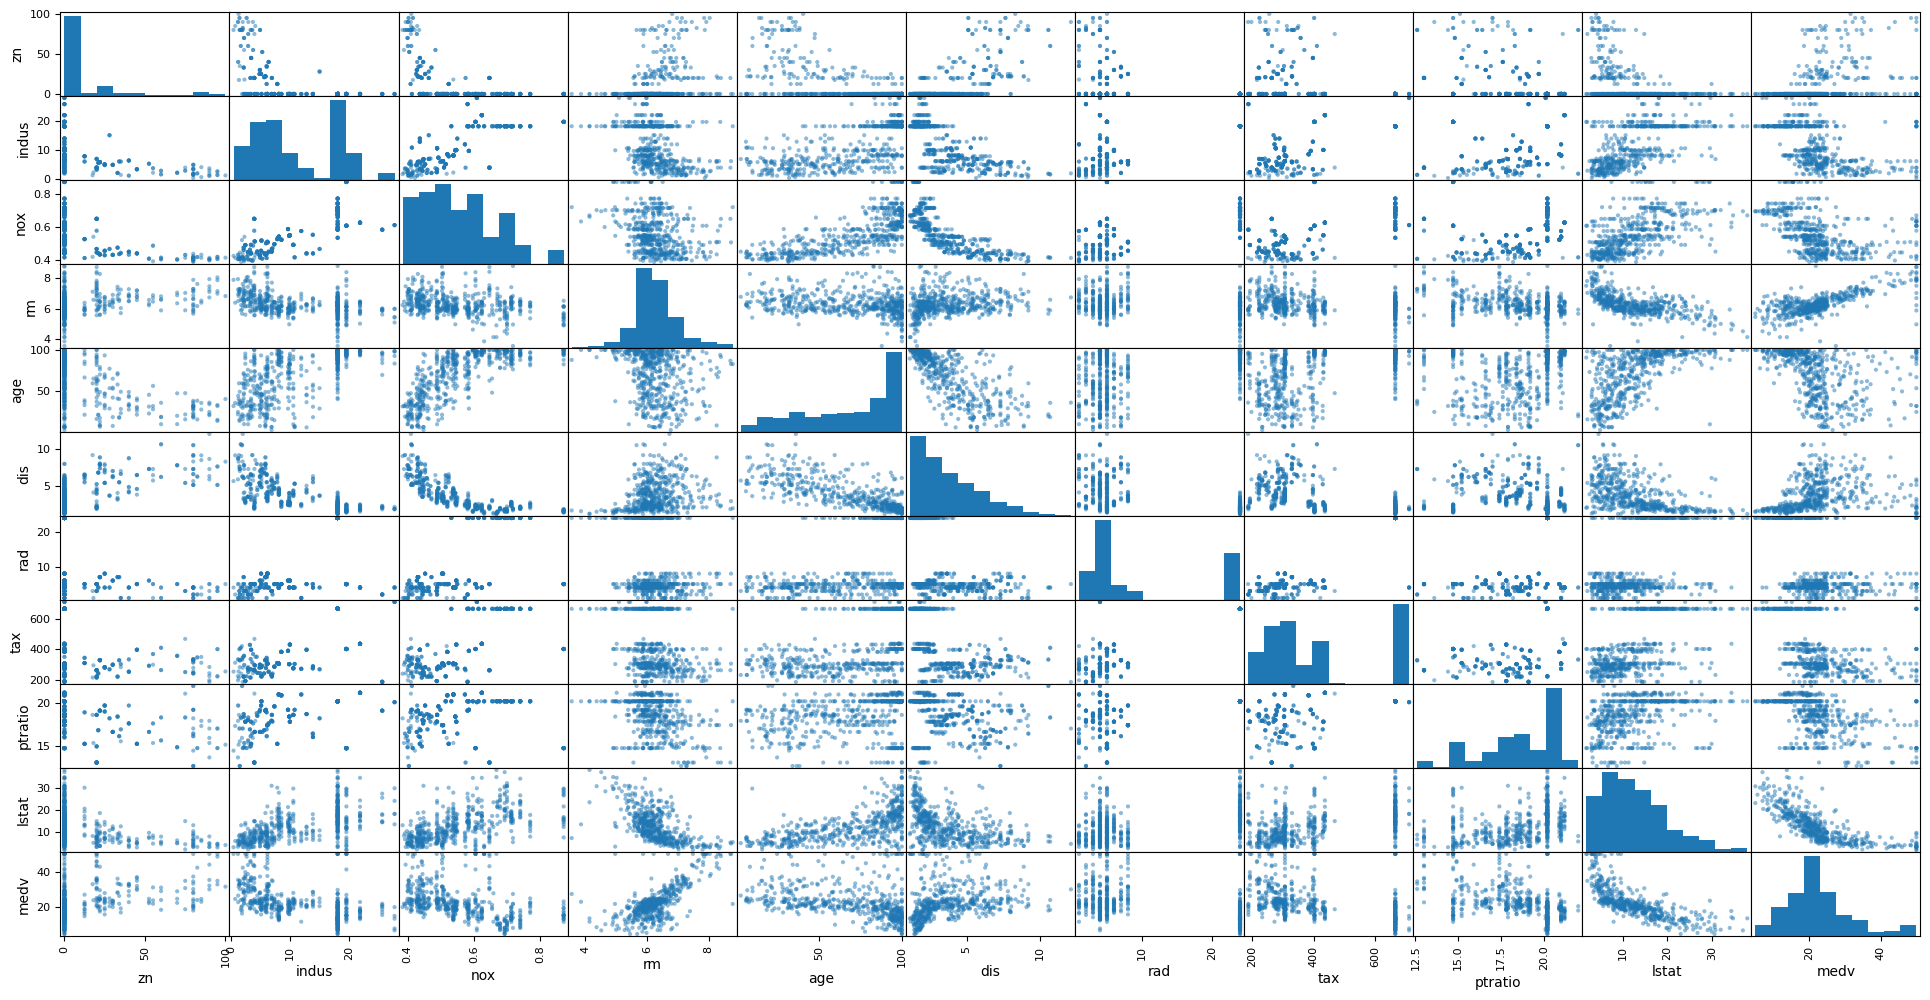

In [4]:
pd.plotting.scatter_matrix(boston[columns.drop(["chas", "crim"])], figsize=(24, 12));

There appears to be a linear increase in NOx (nitric oxide concentration) with the age of buildings, suggesting that older structures are associated with higher pollution levels, possibly due to outdated materials or construction practices. Distance to Boston’s employment centers is negatively correlated with NOx, likely because these centers are often located in industrial areas with higher emissions. Additionally, NOx increases with the percentage of lower-status individuals (lstat), possibly reflecting that lower, income communities may lack access to newer, better-quality housing and infrastructure.

The median value of homes (medv) increases with the number of rooms (rm), as expected, and decreases with lstat, highlighting a strong inverse relationship between socioeconomic status and housing value. While NOx has a slight negative effect on medv, the high variance in this relationship suggests it's not a primary driver of housing prices, but rather a contributing factor influenced by other variables.

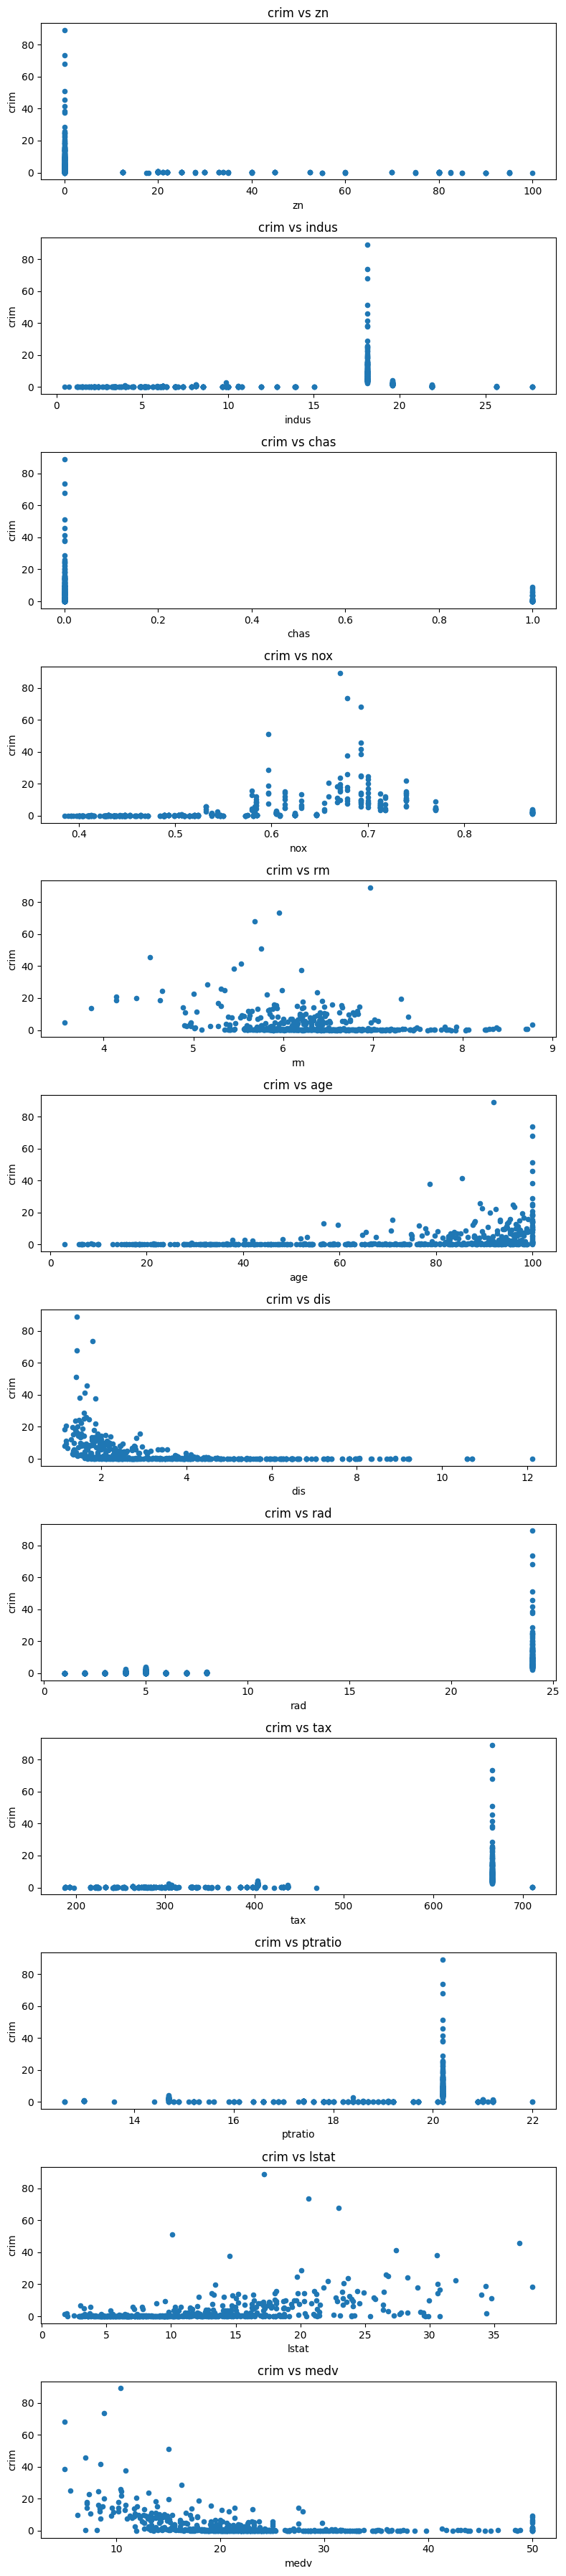

In [5]:
import matplotlib.pyplot as plt

predictors = boston.columns.drop("crim")
fig, axes = plt.subplots(len(predictors), 1, figsize=(8, 3 * len(predictors)))
for i, predictor in enumerate(predictors):
    ax = axes[i]
    boston.plot.scatter(x=predictor, y="crim", ax=ax)
    ax.set_title(f"crim vs {predictor}")
plt.tight_layout()
plt.show()

None of the predictors exhibit a strong or consistent relationship with the crim (crime rate) indicator. However, a few interesting patterns and anomalies are worth noting:

- ptratio shows an unusual spike in crime rate around the value 20, which may indicate a localized anomaly or data grouping issue.
- Lower medv (median home value) is associated with slightly higher crime rates, but the relationship is highly variable and tends to stabilize around a medv value of 25. Notably, at medv = 50, there is a small spike in crime just below 20, likely caused by outliers or capped values.
- lstat (percentage of lower-status population) appears to be positively associated with crim, but again, the relationship is marked by high variance, indicating other influencing factors.
- tax values around 650 correspond to a sudden spike in crime, ranging from 0 to 80—anomalous behavior that is also observed with rad = 25, which similarly shows a sharp jump in crime. These may be artifacts of specific neighborhoods or structural grouping in the dataset.
- Older neighborhoods (higher age) show a slight upward trend in crime, though the effect is relatively weak.
- Low dis values (shorter distance to employment centers) are associated with higher crime rates, which quickly decline and stabilize as dis increases, possibly due to proximity to industrial or densely populated urban areas.

Overall, while most relationships between predictors and crim are weak or highly variable, the dataset reveals several unusual spikes that could reflect localized effects, data imbalance, or unobserved confounding variables. These warrant further investigation.

In [6]:
thresholds = boston[['crim', 'tax', 'ptratio']].quantile(0.95)

high_crim = boston[boston['crim'] > thresholds['crim']]
high_tax = boston[boston['tax'] > thresholds['tax']]
high_ptratio = boston[boston['ptratio'] > thresholds['ptratio']]

In [7]:
high_crim

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
Id,,,,,,,,,,,,,
375,18.4982,0.0,18.1,0,0.668,4.138,100.0,1.1370,24,666,20.2,37.97,13.8
376,19.6091,0.0,18.1,0,0.671,7.313,97.9,1.3163,24,666,20.2,13.44,15.0
379,23.6482,0.0,18.1,0,0.671,6.380,96.2,1.3861,24,666,20.2,23.69,13.1
380,17.8667,0.0,18.1,0,0.671,6.223,100.0,1.3861,24,666,20.2,21.78,10.2
381,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,17.21,10.4
382,15.8744,0.0,18.1,0,0.671,6.545,99.1,1.5192,24,666,20.2,21.08,10.9
385,20.0849,0.0,18.1,0,0.700,4.368,91.2,1.4395,24,666,20.2,30.63,8.8
386,16.8118,0.0,18.1,0,0.700,5.277,98.1,1.4261,24,666,20.2,30.81,7.2
387,24.3938,0.0,18.1,0,0.700,4.652,100.0,1.4672,24,666,20.2,28.28,10.5


All the listed suburbs with high crim values share a common profile:
- indus = 18.1, indicating these are heavily industrial zones.
- rad = 24 and tax = 666, suggesting high accessibility to highways and uniformly high property taxes in these areas.
- ptratio = 20.2 is also consistent, indicating a relatively high student-to-teacher ratio.
- age is very high, often close to or at 100%, meaning these neighborhoods have mostly older housing stock.

- Many entries have low rm (average number of rooms) and low medv (home value), reflecting poorer living conditions.

- A few outliers (e.g., crim = 88.98, 73.53, 67.92) stand out sharply, indicating extreme crime levels, likely in very specific, distressed industrial zones.

- Despite the high crime rates, some homes still have moderately high rm values (e.g., 7.313), indicating a mix of housing types even within high-crime tracts.

In [8]:
high_tax

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
Id,,,,,,,,,,,,,
489,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,18.06,15.2
490,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,23.97,7.0
491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,29.68,8.1
492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6
493,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,13.35,20.1


These suburbs are highly industrial, older, and likely lower-income areas, matching the profile for maximum tax rates in the dataset. The high tax values in these zones might reflect higher municipal service needs or targeted industrial taxation, not necessarily better infrastructure or education (as suggested by middling ptratio and low medv).

In [9]:
high_ptratio

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
Id,,,,,,,,,,,,,
55,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,14.80,18.9
128,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,17.19,16.2
129,0.32543,0.0,21.89,0,0.624,6.431,98.8,1.8125,4,437,21.2,15.39,18.0
130,0.88125,0.0,21.89,0,0.624,5.637,94.7,1.9799,4,437,21.2,18.34,14.3
131,0.34006,0.0,21.89,0,0.624,6.458,98.9,2.1185,4,437,21.2,12.60,19.2
132,1.19294,0.0,21.89,0,0.624,6.326,97.7,2.2710,4,437,21.2,12.26,19.6
133,0.59005,0.0,21.89,0,0.624,6.372,97.9,2.3274,4,437,21.2,11.12,23.0
134,0.32982,0.0,21.89,0,0.624,5.822,95.4,2.4699,4,437,21.2,15.03,18.4
135,0.97617,0.0,21.89,0,0.624,5.757,98.4,2.3460,4,437,21.2,17.31,15.6


- Higher pupil-teacher ratios tend to be associated with more industrial, older neighborhoods with moderate to lower housing quality.
- These areas don’t necessarily have high crime but may face other socioeconomic challenges like lower income levels and larger class sizes in schools.
- The combination of high industrial presence and older housing stock could indicate neighborhoods with limited public resources or overburdened school systems.

In [14]:
len(boston[boston["chas"] == 1])

35

In [15]:
boston["ptratio"].median()

np.float64(19.05)

In [16]:
boston[boston['medv'] == boston['medv'].min()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
Id,,,,,,,,,,,,,
399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


In [19]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


The two suburbs with the lowest median home values (medv = 5.0) stand out starkly from the dataset averages. Their crime rates (crim = 38.35 and 67.92) are drastically higher than the mean of 3.61, placing them in the top 1% of the dataset. Both have 0% residential zoning (zn = 0), aligning with older, unregulated urban areas. Industrial proportion (indus = 18.1) and pollution levels (nox = 0.693) are also well above average, suggesting industrial adjacency. Room count (rm ≈ 5.5) is below the mean of 6.28, and 100% building age (age) confirms fully aged housing stock. These suburbs also have short distances to employment centers (dis ≈ 1.4), likely reflecting urban congestion, and maximum highway access and near-maximum tax rates (rad = 24, tax = 666). Both have high pupil–teacher ratios (ptratio = 20.2), above the mean of 18.45, and significantly elevated lower-status populations (lstat = 30.59, 22.98) compared to the dataset average of 12.65. In short, these neighborhoods reflect compounding structural disadvantages across nearly all predictors, explaining their rock-bottom property values.

In [20]:
len(boston[boston['rm'] > 7])

64

In [21]:
len(boston[boston['rm'] > 8])

13

In [22]:
boston[boston['rm'] > 8]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
Id,,,,,,,,,,,,,
98,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
225,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
226,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
227,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,3.13,37.6
233,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,2.47,41.7
234,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,3.95,48.3
254,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,3.54,42.8


Suburbs with rm > 8 (i.e., more than 8 rooms per dwelling) clearly stand out as highly affluent, showing very high median home values, often close to or at the maximum value of 50. Most have low crime rates, low LSTAT (indicating wealthier populations), and moderate to low NOX values (better air quality). These areas also tend to have low pupil-teacher ratios and reasonable tax rates, with a few exceptions (e.g., ID 365 with high crime and NOX despite high RM). Overall, having more than 8 rooms correlates strongly with desirable living conditions, low poverty, and premium property values.